In [1]:
from trajectree.sequence.swap import perform_swapping_simulation
# import trajectree

import numpy as np
from matplotlib import pyplot as plt

/home/asingal/home/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/asingal/home/.venv/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
# Set simulation params
trunc = 3
N = trunc+1
error_tolerance = 1e-7

params = {
    "PA_det_eff": 1,
    "BSM_det_loss_1": 1e-6, #  0.045,
    "BSM_det_loss_2": 1e-6, # 0.135,
    "BSM_dark_counts_1": 1,
    "BSM_dark_counts_2": 1,
    "alpha_list": np.array([np.pi/2]),
    "delta_list": np.array([np.pi/2]),
    "channel_loss": 0,
    "chi": 0.24,
    "BSM_meas": {0:(2,3), 1:(6,7)},

    "if_analyze_entanglement": True,
    "calc_fidelity": False,
}

num_modes = 8
# Create vacuum state
 
# idler_angles = np.linspace(0, np.pi, 1)
# signal_angles = np.linspace(0, 4*np.pi, 30)

num_simulations = 10
visibilities = []

cache_sizes = [2]

for i in [1e-3]: # np.linspace(0.1, 0.5, 5):
    prob_same_phase = 0
    prob_diff_phase = 0

    # params['chi'] = i
    params["BSM_dark_counts_1"] = 1+i
    params["BSM_dark_counts_2"] = 1+i

    params["alpha_list"] = np.array([np.pi/2])

    fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
    print("probabilities:", probabilities)
    print("fidelities:", fidelities)
    prob_same_phase += np.mean(probabilities)

    params["alpha_list"] = np.array([3*np.pi/2])

    fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
    print("probabilities:", probabilities)
    print("fidelities:", fidelities)
    prob_diff_phase += np.mean(probabilities)

    visibilities.append((prob_same_phase - prob_diff_phase) / (prob_same_phase + prob_diff_phase))
# params["BSM_meas"] = {1:(2,3), 0:(6,7)}

# fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
# prob_diff_phase += np.mean(probabilities)

# params["alpha_list"] = np.array([np.pi/2])

# fidelities, probabilities, t_eval = perform_swapping_simulation(N, num_modes, num_simulations, params = params, error_tolerance = error_tolerance)
# prob_same_phase += np.mean(probabilities)

/home/asingal/home/quimb/quimb/tensor/tensor_1d.py:1867: RuntimeWarning: divide by zero encountered in divide
  self[insert].modify(data=self[insert].data / norm**0.5)
/home/asingal/home/quimb/quimb/tensor/tensor_1d.py:1867: RuntimeWarning: invalid value encountered in divide
  self[insert].modify(data=self[insert].data / norm**0.5)


probabilities: [np.complex128(0j), np.complex128(0j), np.complex128(0j), np.complex128(0j), np.complex128(0j), np.complex128(0j), np.complex128(2.6616452939152916e-127+0j), np.complex128(0j), np.complex128(0j), np.complex128(0j)]
fidelities: []
probabilities: [np.complex128(0j), np.complex128(0j), np.complex128(0j), np.complex128(0j), np.complex128(0j), np.complex128(0j), np.complex128(0j), np.complex128(0j), np.complex128(0j), np.complex128(0j)]
fidelities: []


[np.complex128(1+0j)]


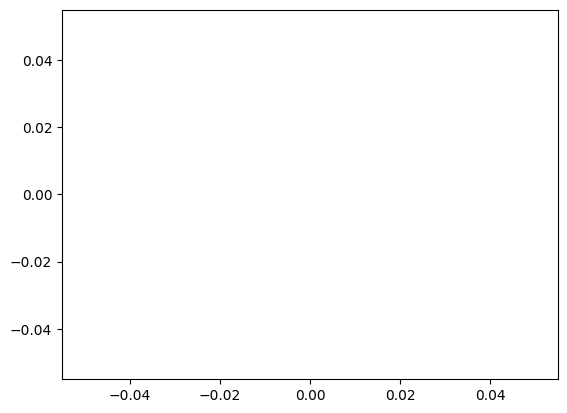

In [3]:
plt.plot(visibilities[1:])
print(visibilities)

In [4]:
(prob_same_phase - prob_diff_phase) / (prob_same_phase + prob_diff_phase)

np.complex128(1+0j)